# Exploring Dandiset 001359: Patch-seq data from human brain tissue

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001359](https://dandiarchive.org/dandiset/001359/0.250401.1603) version 0.250401.1603, titled "20250331_AIBS_Patchseq_human".

According to its metadata, the Dandiset contains:
- **Description:** HMBA Lein PatchSeq upload (human) (Q1 2025)
- **Keywords:** Patch-seq, human, multimodal
- **Contributors:** Gonzalez, Limary; Allen Institute for Brain Science; National Institute of Mental Health; Kalmbach, Brian; Dalley, Rachel; Lein, Ed; Lee, Brian
- **Variables Measured:** CurrentClampStimulusSeries, ProcessingModule, CurrentClampSeries, VoltageClampSeries, VoltageClampStimulusSeries
- **Measurement Techniques:** Voltage clamp, current clamp, analytical techniques.

This notebook will demonstrate how to:
1. Connect to the DANDI archive and retrieve Dandiset information.
2. List assets within the Dandiset.
3. Load a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Inspect basic metadata and structure of the NWB file.
5. Visualize some of the electrophysiological data contained in the NWB file, including:
    - A segment of a Current Clamp Series.
    - Comparison of multiple sweeps under similar stimulus conditions.
    - An example of plotting detected spike times over raw data.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (dependency for pynwb for HDF5 file access)
- `remfile` (for streaming remote HDF5 files)
- `matplotlib` (for plotting)
- `numpy` (for numerical operations)
- `pandas` (for data manipulation, e.g., NWB file tables)
- `seaborn` (for enhanced visualizations)

It is assumed these packages are already installed in your Python environment.

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply a plotting style
sns.set_theme()

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001359"
dandiset_version = "0.250401.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata.get('url', 'URL not available in raw_metadata, see link above')}") # Older metadata might not have 'url' directly
print(f"Dandiset description: {metadata['description']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Dandiset description: HMBA Lein PatchSeq upload (human) (Q1 2025)

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading an NWB file

We will now load one specific NWB file from the Dandiset to explore its contents. We'll use the file `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.

The URL for this NWB asset (ID: `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`) is:
`https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/`

This URL is used directly to stream the file.

In [3]:
# Hardcoded URL for the chosen NWB file as per instructions (derived from nwb-file-info tool output)
nwb_asset_id = "c269347a-2d4b-4b6a-8b7c-2ef303ff503d"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
nwb_file_path_in_dandiset = "sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb"

print(f"Loading NWB file: {nwb_file_path_in_dandiset}")
print(f"From URL: {nwb_url}")

# Load the NWB file using remfile for remote access
# The following code is based on the output of `tools_cli.py nwb-file-info`
remote_f = remfile.File(nwb_url)
h5_f = h5py.File(remote_f, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_f, mode='r') # Pass the h5py.File object
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")

Loading NWB file: sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
From URL: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session description: PLACEHOLDER
Session start time: 2022-09-06 17:44:39.146000+00:00
Subject ID: 1203384279


### Explore this NWB file on Neurosift

You can explore the detailed structure and contents of this NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603)

### Summary of NWB File Contents

The NWB file format organizes data into various groups. Key groups include:
- `acquisition`: Contains raw acquired data, typically as TimeSeries objects (e.g., VoltageClampSeries, CurrentClampSeries).
- `stimulus`: Contains information about stimuli presented.
- `processing`: Contains processed data, such as detected spike times.
- `intervals`: Contains information about experimental epochs or trials.

Let's look at the names of the time series available in the `acquisition` group:

In [4]:
print("Available series in nwbfile.acquisition:")
for series_name in nwbfile.acquisition:
    print(f"- {series_name} (type: {type(nwbfile.acquisition[series_name]).__name__})")

Available series in nwbfile.acquisition:
- data_00000_AD0 (type: VoltageClampSeries)
- data_00001_AD0 (type: VoltageClampSeries)
- data_00002_AD0 (type: VoltageClampSeries)
- data_00003_AD0 (type: VoltageClampSeries)
- data_00004_AD0 (type: CurrentClampSeries)
- data_00005_AD0 (type: CurrentClampSeries)
- data_00006_AD0 (type: CurrentClampSeries)
- data_00007_AD0 (type: CurrentClampSeries)
- data_00008_AD0 (type: CurrentClampSeries)
- data_00009_AD0 (type: CurrentClampSeries)
- data_00010_AD0 (type: CurrentClampSeries)
- data_00011_AD0 (type: CurrentClampSeries)
- data_00012_AD0 (type: CurrentClampSeries)
- data_00013_AD0 (type: CurrentClampSeries)
- data_00014_AD0 (type: CurrentClampSeries)
- data_00015_AD0 (type: CurrentClampSeries)
- data_00016_AD0 (type: CurrentClampSeries)
- data_00017_AD0 (type: CurrentClampSeries)
- data_00018_AD0 (type: CurrentClampSeries)
- data_00019_AD0 (type: CurrentClampSeries)
- data_00020_AD0 (type: CurrentClampSeries)
- data_00021_AD0 (type: CurrentClam

#### Stimulus Information
Let's also list the names of the time series available in the `stimulus` group:

In [5]:
print("\nAvailable series in nwbfile.stimulus:")
if nwbfile.stimulus:
    for series_name in nwbfile.stimulus:
        print(f"- {series_name} (type: {type(nwbfile.stimulus[series_name]).__name__})")
else:
    print("No stimulus data found in this NWB file.")


Available series in nwbfile.stimulus:
- data_00000_DA0 (type: VoltageClampStimulusSeries)
- data_00001_DA0 (type: VoltageClampStimulusSeries)
- data_00002_DA0 (type: VoltageClampStimulusSeries)
- data_00003_DA0 (type: VoltageClampStimulusSeries)
- data_00004_DA0 (type: CurrentClampStimulusSeries)
- data_00005_DA0 (type: CurrentClampStimulusSeries)
- data_00006_DA0 (type: CurrentClampStimulusSeries)
- data_00007_DA0 (type: CurrentClampStimulusSeries)
- data_00008_DA0 (type: CurrentClampStimulusSeries)
- data_00009_DA0 (type: CurrentClampStimulusSeries)
- data_00010_DA0 (type: CurrentClampStimulusSeries)
- data_00011_DA0 (type: CurrentClampStimulusSeries)
- data_00012_DA0 (type: CurrentClampStimulusSeries)
- data_00013_DA0 (type: CurrentClampStimulusSeries)
- data_00014_DA0 (type: CurrentClampStimulusSeries)
- data_00015_DA0 (type: CurrentClampStimulusSeries)
- data_00016_DA0 (type: CurrentClampStimulusSeries)
- data_00017_DA0 (type: CurrentClampStimulusSeries)
- data_00018_DA0 (type: C

#### Processing Module Information
The `processing` module can contain various derived data. Let's see what's available.

In [6]:
print("\nAvailable modules in nwbfile.processing:")
if nwbfile.processing:
    for module_name, data_interface in nwbfile.processing.items():
        print(f"- Module: {module_name} (type: {type(data_interface).__name__})")
        if hasattr(data_interface, 'data_interfaces'): # Standard for ProcessingModule
            print(f"  Data interfaces within {module_name}:")
            for di_name, di_obj in data_interface.data_interfaces.items():
                 print(f"  - {di_name} (type: {type(di_obj).__name__})")
else:
    print("No processing modules found in this NWB file.")


Available modules in nwbfile.processing:
- Module: spikes (type: ProcessingModule)
  Data interfaces within spikes:
  - Sweep_10 (type: TimeSeries)
  - Sweep_12 (type: TimeSeries)
  - Sweep_14 (type: TimeSeries)
  - Sweep_15 (type: TimeSeries)
  - Sweep_17 (type: TimeSeries)
  - Sweep_18 (type: TimeSeries)
  - Sweep_20 (type: TimeSeries)
  - Sweep_21 (type: TimeSeries)
  - Sweep_23 (type: TimeSeries)
  - Sweep_26 (type: TimeSeries)
  - Sweep_33 (type: TimeSeries)
  - Sweep_34 (type: TimeSeries)
  - Sweep_36 (type: TimeSeries)
  - Sweep_37 (type: TimeSeries)
  - Sweep_38 (type: TimeSeries)
  - Sweep_39 (type: TimeSeries)
  - Sweep_41 (type: TimeSeries)
  - Sweep_42 (type: TimeSeries)
  - Sweep_5 (type: TimeSeries)
  - Sweep_62 (type: TimeSeries)
  - Sweep_63 (type: TimeSeries)
  - Sweep_64 (type: TimeSeries)
  - Sweep_65 (type: TimeSeries)
  - Sweep_67 (type: TimeSeries)
  - Sweep_7 (type: TimeSeries)
  - Sweep_9 (type: TimeSeries)


#### Epochs Table
The `epochs` table provides information about different experimental periods. Let's display the first few rows of this table.

In [7]:
if nwbfile.epochs is not None:
    epochs_df = nwbfile.epochs.to_dataframe()
    print("Epochs table head:")
    pd.set_option('display.max_columns', None) # Show all columns
    pd.set_option('display.max_colwidth', None) # Show full content of columns
    print(epochs_df.head())
    print(f"\nEpochs table shape: {epochs_df.shape}")

    # Extract and print unique tags for general information
    all_tags = []
    for tags_list_entry in epochs_df['tags']: # Iterate through potentially multiple lists of tags per epoch
        if isinstance(tags_list_entry, (list, np.ndarray)):
             all_tags.extend(tags_list_entry)
        elif isinstance(tags_list_entry, str): # handle if a tag is a single string
             all_tags.append(tags_list_entry)

    unique_tags = sorted(list(set(all_tags)))
    # Display a limited number of unique tags to avoid excessive output
    max_tags_to_show = 15
    if len(unique_tags) > max_tags_to_show:
        print(f"\nSample of unique tags found in epochs (first {max_tags_to_show} of {len(unique_tags)}): {unique_tags[:max_tags_to_show]}...")
    else:
        print(f"\nUnique tags found in epochs: {unique_tags}")
else:
    print("No epochs table found in this NWB file.")

Epochs table head:


    start_time  stop_time  \
id                          
1       80.812     80.857   
2       80.812     80.912   
3       80.857     80.867   
4       80.867     80.912   
5       80.912     81.412   

                                                                      tags  \
id                                                                           
1             [Type=Inserted Testpulse, SubType=Baseline, ShortName=TP_B0]   
2                                  [Type=Inserted Testpulse, ShortName=TP]   
3   [Type=Inserted Testpulse, SubType=Pulse, Amplitude=10, ShortName=TP_P]   
4             [Type=Inserted Testpulse, SubType=Baseline, ShortName=TP_B1]   
5                         [Name=Baseline Chunk, Index=0, ShortName=U_BLC0]   

                                                                                                                                                                                                                                                         

## Visualizing Data from the NWB File

Now, let's visualize some of the data. We'll start by plotting a segment of a `CurrentClampSeries`.

### Plotting a segment of a Current Clamp Series

We'll select `data_00004_AD0` from the acquisition data, which is a `CurrentClampSeries`. The choice of `data_00004_AD0` is arbitrary for demonstration.

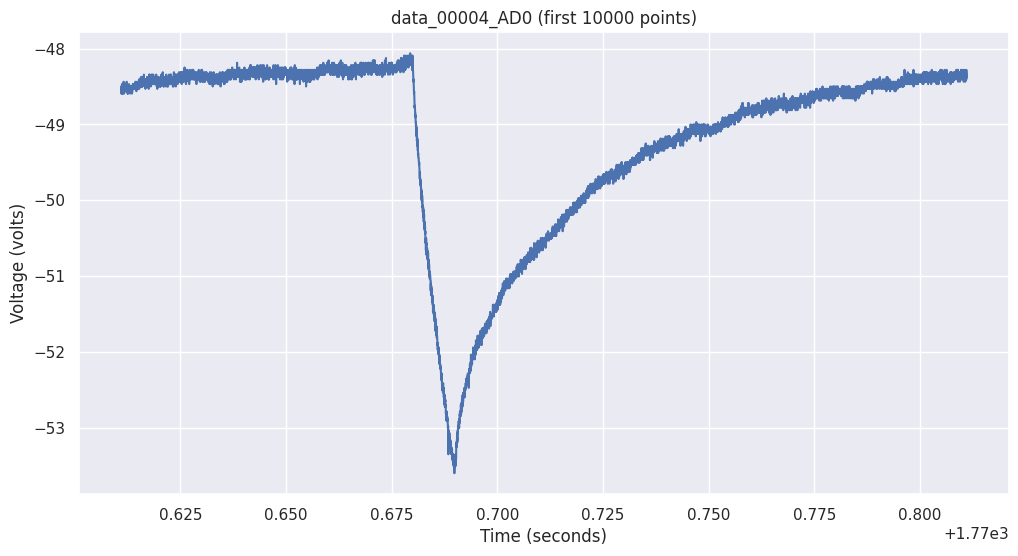

In [8]:
ccs_name = "data_00004_AD0"
if ccs_name in nwbfile.acquisition and isinstance(nwbfile.acquisition[ccs_name], pynwb.icephys.CurrentClampSeries):
    ccs = nwbfile.acquisition[ccs_name]
    
    # Load a segment of data (e.g., first 10000 points)
    num_points_to_plot = 10000
    data_segment = ccs.data[:num_points_to_plot]
    
    # Create a time vector for the segment
    # Timestamps can be generated if ccs.timestamps is None (for regularly sampled data)
    if ccs.timestamps is None: # Regularly sampled
        time_segment = (np.arange(len(data_segment)) / ccs.rate) + ccs.starting_time
    else: # Irregularly sampled (use provided timestamps)
        time_segment = ccs.timestamps[:num_points_to_plot]

    plt.figure(figsize=(12, 6))
    plt.plot(time_segment, data_segment)
    plt.xlabel(f"Time ({ccs.starting_time_unit if hasattr(ccs, 'starting_time_unit') else 's'})")
    plt.ylabel(f"Voltage ({ccs.unit})")
    plt.title(f"{ccs_name} (first {num_points_to_plot} points)")
    plt.show()
else:
    print(f"CurrentClampSeries '{ccs_name}' not found or is not of the correct type in nwbfile.acquisition.")

### Plotting multiple sweeps with similar stimulus

Patch-clamp experiments often involve repeated presentations of the same or similar stimuli. Let's find `CurrentClampSeries` traces that correspond to a specific stimulus description, "X1PS_SubThresh_DA_0", and plot segments from a few of them in separate subplots. This can help observe variability or consistency in responses.

Looking for CurrentClampSeries with stimulus_description: 'X1PS_SubThresh_DA_0'
Plotting segment from: data_00005_AD0 in subplot 1
Plotting segment from: data_00006_AD0 in subplot 2
Plotting segment from: data_00007_AD0 in subplot 3


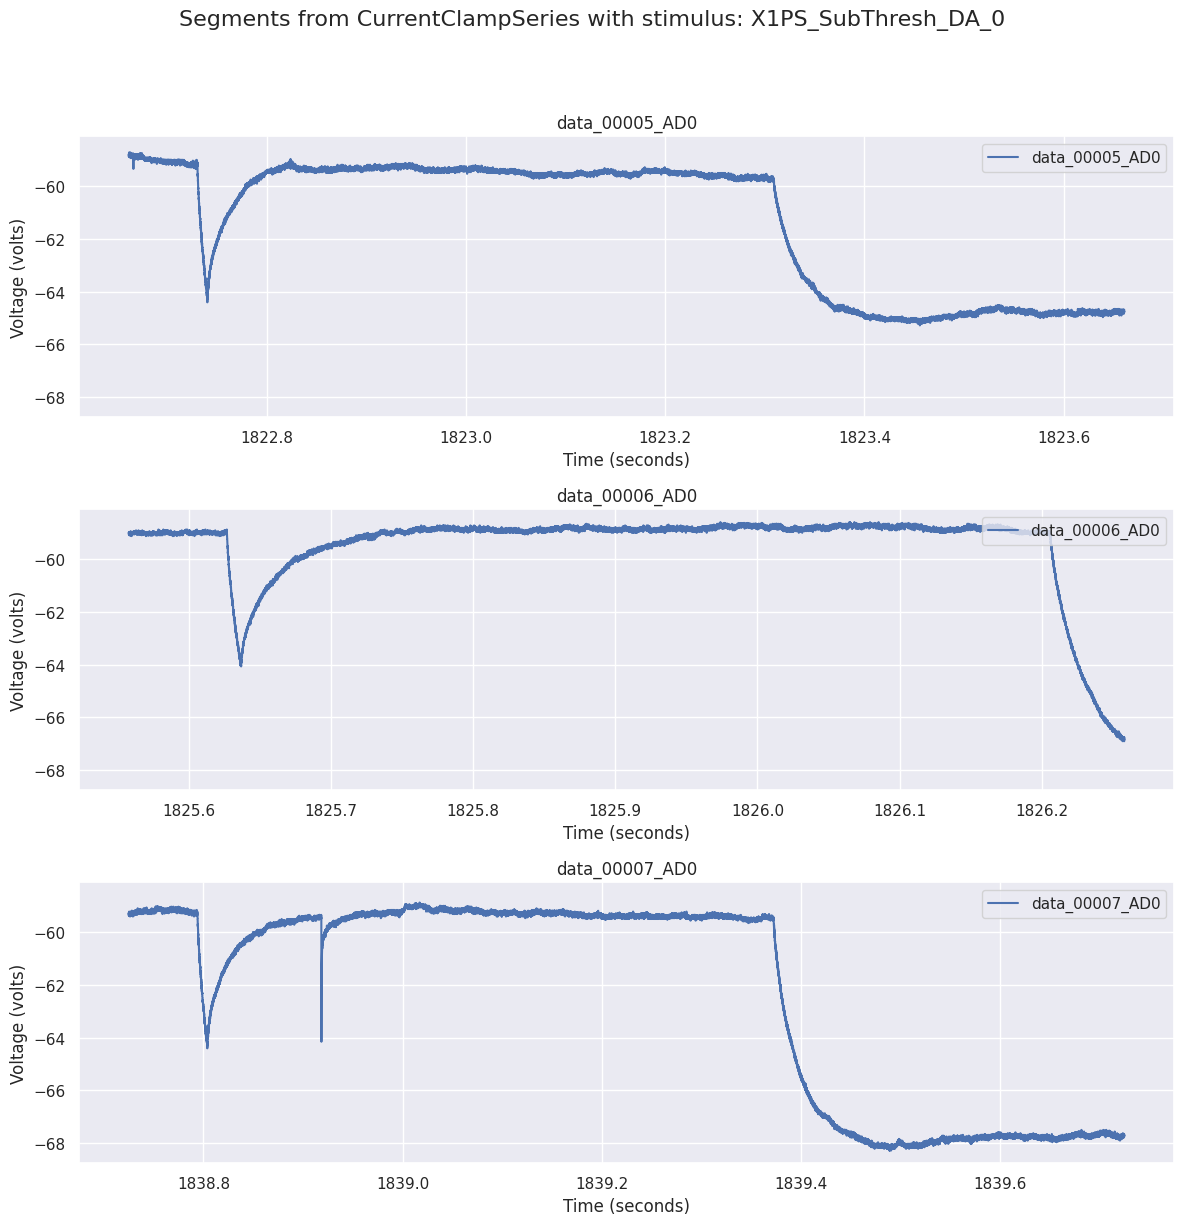

In [9]:
target_stim_desc = "X1PS_SubThresh_DA_0"
num_series_to_plot = 3 # Plot a few series for comparison
points_per_series_segment = 50000 # Number of data points for the segment from each series

print(f"Looking for CurrentClampSeries with stimulus_description: '{target_stim_desc}'")

# Collect series to plot
series_to_plot_dict = {}
for series_name, series_obj in nwbfile.acquisition.items():
    if isinstance(series_obj, pynwb.icephys.CurrentClampSeries) and \
       hasattr(series_obj, 'stimulus_description') and \
       series_obj.stimulus_description == target_stim_desc:
        if len(series_to_plot_dict) < num_series_to_plot:
            series_to_plot_dict[series_name] = series_obj

if series_to_plot_dict:
    num_found = len(series_to_plot_dict)
    fig, axes = plt.subplots(num_found, 1, figsize=(12, 4 * num_found), sharex=False, sharey=True) # Share Y axis for consistent voltage scale
    if num_found == 1: # If only one subplot, axes is not an array
        axes = [axes] 

    plot_idx = 0
    for series_name, series_obj in series_to_plot_dict.items():
        ax = axes[plot_idx]
        print(f"Plotting segment from: {series_name} in subplot {plot_idx+1}")
        data_segment = series_obj.data[:points_per_series_segment]
        
        if series_obj.timestamps is None:
             time_segment = (np.arange(len(data_segment)) / series_obj.rate) + series_obj.starting_time
        else:
             time_segment = series_obj.timestamps[:len(data_segment)]
        
        ax.plot(time_segment, data_segment, label=f"{series_name}")
        ax.set_title(f"{series_name}")
        ax.set_ylabel(f"Voltage ({series_obj.unit})")
        if hasattr(series_obj, 'starting_time_unit'):
            ax.set_xlabel(f"Time ({series_obj.starting_time_unit})")
        else:
            ax.set_xlabel("Time (s)")
        ax.legend(loc='upper right')
        plot_idx += 1
    
    fig.suptitle(f"Segments from CurrentClampSeries with stimulus: {target_stim_desc}", fontsize=16, y=1.02 if num_found > 1 else 1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.98 if num_found > 1 else 0.95]) # Adjust layout to make space for suptitle
    plt.show()
else:
    print(f"No CurrentClampSeries found with stimulus_description: '{target_stim_desc}'.")

### Visualizing Detected Spikes

The NWB file may contain information about detected spikes, often found in the `processing` module. Let's try to plot spike times for a specific sweep (`Sweep_33`) overlaid on its corresponding raw data trace (`data_00033_AD0`).

**Note:** The association between `Sweep_XX` in `processing['spikes']` and `data_000XX_AD0` in `acquisition` is based on common naming conventions in electrophysiology experiments but should be verified for specific datasets. The spike times in `processing` are typically relative to the start of the corresponding acquisition trace.

Processing data_00033_AD0 and spikes from Sweep_33


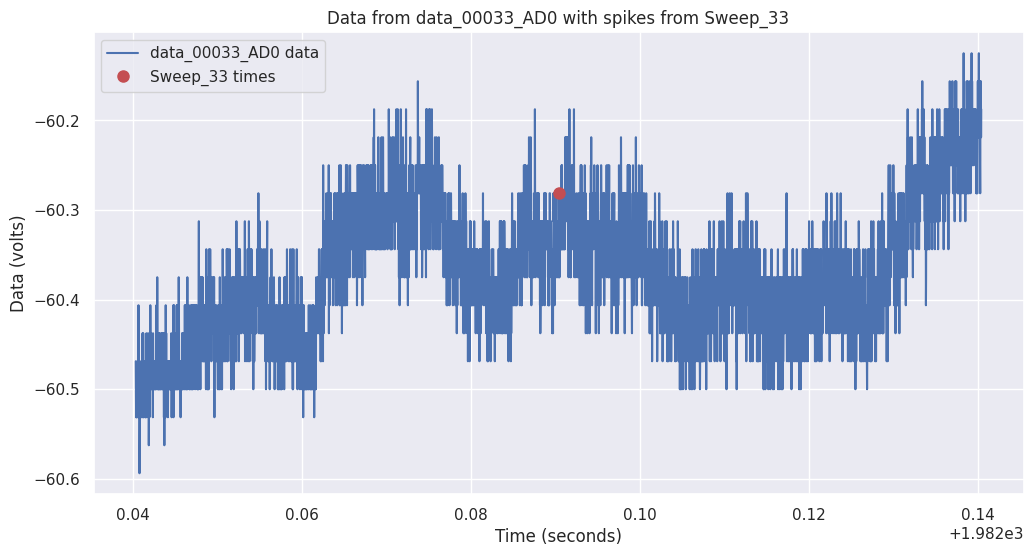

In [10]:
spike_series_name_in_processing = "Sweep_33"
acquisition_series_name_for_spikes = "data_00033_AD0" # Assumed corresponding acquisition

plot_spike_data = False
if "spikes" in nwbfile.processing and \
   spike_series_name_in_processing in nwbfile.processing["spikes"].data_interfaces and \
   acquisition_series_name_for_spikes in nwbfile.acquisition:

    spike_times_series = nwbfile.processing["spikes"].data_interfaces[spike_series_name_in_processing]
    acquisition_series_for_spikes = nwbfile.acquisition[acquisition_series_name_for_spikes]

    if isinstance(acquisition_series_for_spikes, pynwb.icephys.CurrentClampSeries) and \
       hasattr(spike_times_series, 'timestamps') and len(spike_times_series.timestamps) > 0:
        
        print(f"Processing {acquisition_series_name_for_spikes} and spikes from {spike_series_name_in_processing}")
        
        spike_timestamps_relative = spike_times_series.timestamps[:]
        # Absolute spike times in the context of the NWB file (start of acquisition + relative spike time)
        absolute_spike_times = acquisition_series_for_spikes.starting_time + spike_timestamps_relative

        # Define a window around the first spike to plot (e.g., +/- 50 ms)
        if len(absolute_spike_times) > 0:
            first_spike_time_abs = absolute_spike_times[0]
            window_radius_sec = 0.050 # 50 ms

            start_time_window_abs = first_spike_time_abs - window_radius_sec
            end_time_window_abs = first_spike_time_abs + window_radius_sec

            # Determine data indices for this window
            # Ensure indices are within bounds and valid
            start_index = int(np.maximum(0, (start_time_window_abs - acquisition_series_for_spikes.starting_time) * acquisition_series_for_spikes.rate))
            end_index = int(np.minimum(len(acquisition_series_for_spikes.data), (end_time_window_abs - acquisition_series_for_spikes.starting_time) * acquisition_series_for_spikes.rate))
            
            if start_index < end_index and end_index <= len(acquisition_series_for_spikes.data):
                data_segment_for_spikes = acquisition_series_for_spikes.data[start_index:end_index]
                
                # Time vector for the segment, absolute
                if acquisition_series_for_spikes.timestamps is None:
                    time_segment_abs_for_spikes = acquisition_series_for_spikes.starting_time + (np.arange(start_index, end_index) / acquisition_series_for_spikes.rate)
                else: # Unlikely for CurrentClampSeries data to be irregularly sampled here, but handle just in case
                    time_segment_abs_for_spikes = acquisition_series_for_spikes.timestamps[start_index:end_index]


                plt.figure(figsize=(12, 6))
                plt.plot(time_segment_abs_for_spikes, data_segment_for_spikes, label=f"{acquisition_series_name_for_spikes} data")

                # Plot spike markers (only those within the plotted window)
                spikes_in_window_abs = absolute_spike_times[(absolute_spike_times >= time_segment_abs_for_spikes[0]) & (absolute_spike_times <= time_segment_abs_for_spikes[-1])]
                
                spike_values_in_window = []
                if len(spikes_in_window_abs) > 0:
                    for spike_abs_t in spikes_in_window_abs:
                        idx_at_spike = np.argmin(np.abs(time_segment_abs_for_spikes - spike_abs_t))
                        spike_values_in_window.append(data_segment_for_spikes[idx_at_spike])
                    plt.plot(spikes_in_window_abs, spike_values_in_window, 'ro', markersize=8, label=f"{spike_series_name_in_processing} times")

                plt.xlabel(f"Time ({acquisition_series_for_spikes.starting_time_unit if hasattr(acquisition_series_for_spikes, 'starting_time_unit') else 's'})")
                plt.ylabel(f"Data ({acquisition_series_for_spikes.unit})")
                plt.title(f"Data from {acquisition_series_name_for_spikes} with spikes from {spike_series_name_in_processing}")
                plt.legend()
                plt.show()
                plot_spike_data = True
            else:
                print(f"Calculated window for {acquisition_series_name_for_spikes} is empty or invalid. Start index: {start_index}, End index: {end_index}, Data length: {len(acquisition_series_for_spikes.data)}")
        else:
            print(f"No spikes found in {spike_series_name_in_processing} to plot.")
    else:
        print(f"Could not find or process {acquisition_series_name_for_spikes} or {spike_series_name_in_processing} for spike plotting.")
else:
    print(f"Spike processing module ('spikes'), spike series ('{spike_series_name_in_processing}'), or acquisition series ('{acquisition_series_name_for_spikes}') not found.")

if not plot_spike_data:
     print("Note: Plot for spike data was not generated due to missing data or other issues.")

## Summary and Future Directions

This notebook demonstrated how to access and perform initial exploration of Dandiset 001359, focusing on a single NWB file containing Patch-seq data. We covered:
- Connecting to DANDI and retrieving Dandiset/asset information.
- Loading an NWB file and inspecting its basic metadata and structure (acquisition series, epochs).
- Basic visualization of electrophysiological traces (CurrentClampSeries) and an example of overlaying detected spike times.

**Observations from the example NWB file:**
- The file contains multiple electrophysiological recordings (sweeps) under various stimulus conditions, detailed in `nwbfile.acquisition` and `nwbfile.stimulus`.
- The `epochs` table provides a structured overview of experimental segments and associated metadata tags.
- Spike times are available in the `processing` module for some sweeps, allowing for analysis of neuronal firing.
- The raw data traces can be noisy, which is common in electrophysiological recordings. Further filtering or pre-processing might be needed for detailed spike shape analysis or other advanced analyses.

**Possible Future Directions for Analysis:**
- **Detailed feature extraction:** Analyze spike shapes, firing rates, and other electrophysiological features across different stimuli or cell types (if multiple cells are present in the Dandiset).
- **Correlate with other modalities:** Patch-seq datasets often include transcriptomic or morphological data. If available for this Dandiset, correlate electrophysiological features with these other data types.
- **Comparative analysis:** Extend the analysis to other NWB files within the Dandiset to compare properties across different subjects, sessions, or experimental conditions.
- **Advanced visualization:** Create more sophisticated plots, such as heatmaps of responses across sweeps, inter-spike interval distributions, or phase-plane plots.
- **Programmatic access to stimulus parameters:** The `epochs` table tags (like `Amplitude=X`) or `stimulus` group could be used to programmatically select and analyze responses to specific stimuli.

This notebook provides a starting point. Researchers can adapt and expand upon these examples to conduct more in-depth investigations tailored to their specific scientific questions.

In [11]:
# Close the NWB file at the end of the notebook
if 'io' in locals() and io is not None:
    try:
        io.close()
        print("NWB IO closed.")
    except Exception as e:
        print(f"Error closing NWB IO: {e}")

NWB IO closed.
